In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('D:\MLProjects\Liverdataset 0\indian_liver_patient.csv')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


-renaming the output column

In [6]:
df.rename(columns = {
    'Dataset':'output'
}, inplace=True)

In [7]:
#checking the shape of the dataframe
df.shape

(583, 11)

In [8]:
#checking for the null values 
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
output                        0
dtype: int64

In [9]:
median = df.Albumin_and_Globulin_Ratio.median()

In [10]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(median)

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
output                        0
dtype: int64

In [12]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,output
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


As we can observe there is lot of columns with oultiers to deal with. There is naive bayes which don't care about outliers.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Bilirubin'>

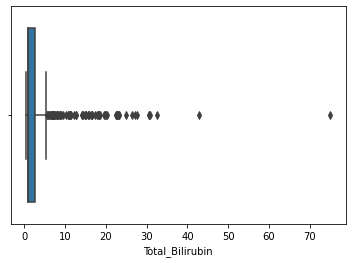

In [14]:
sns.boxplot(df['Total_Bilirubin'])

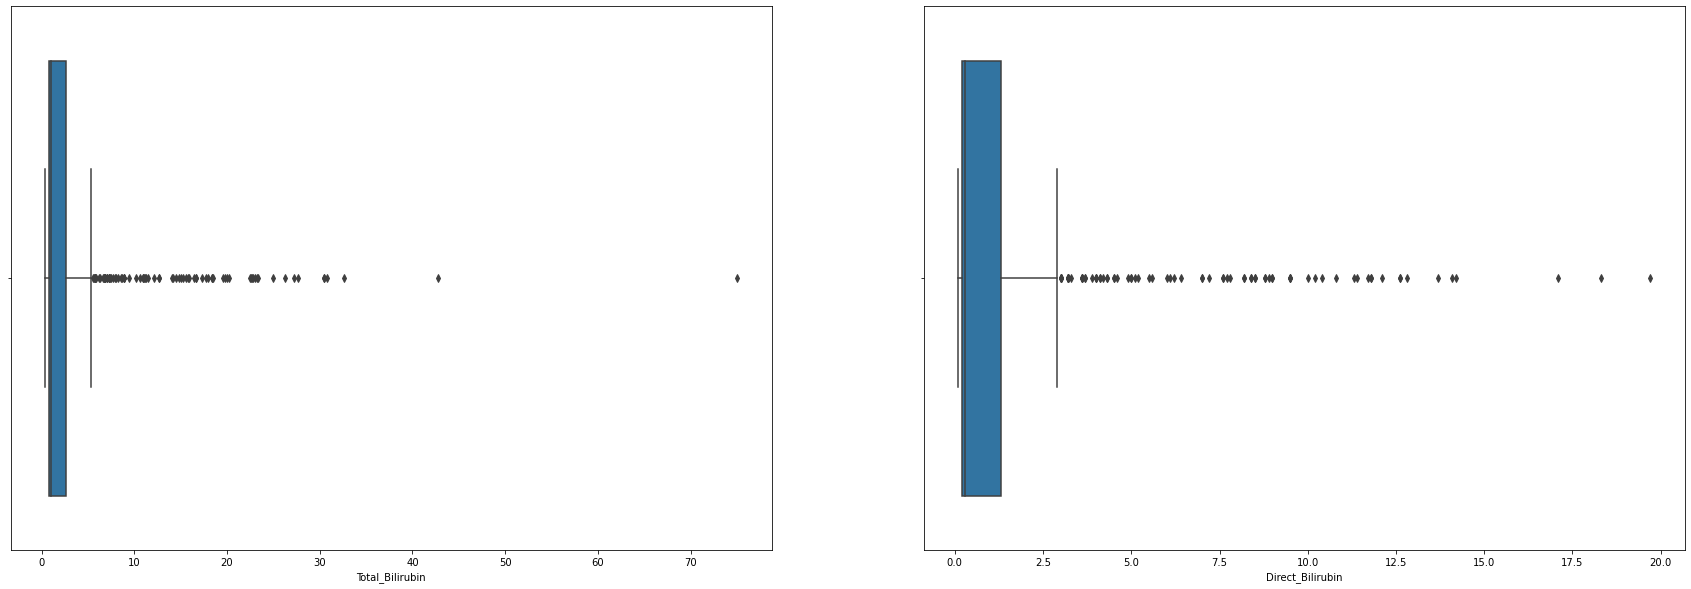

In [13]:
fig, axes = plt.subplots(1,2,figsize = (30, 10)) 

sns.boxplot(ax = axes[0], x = df["Total_Bilirubin"]);

sns.boxplot(ax = axes[1], x = df["Direct_Bilirubin"]);

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

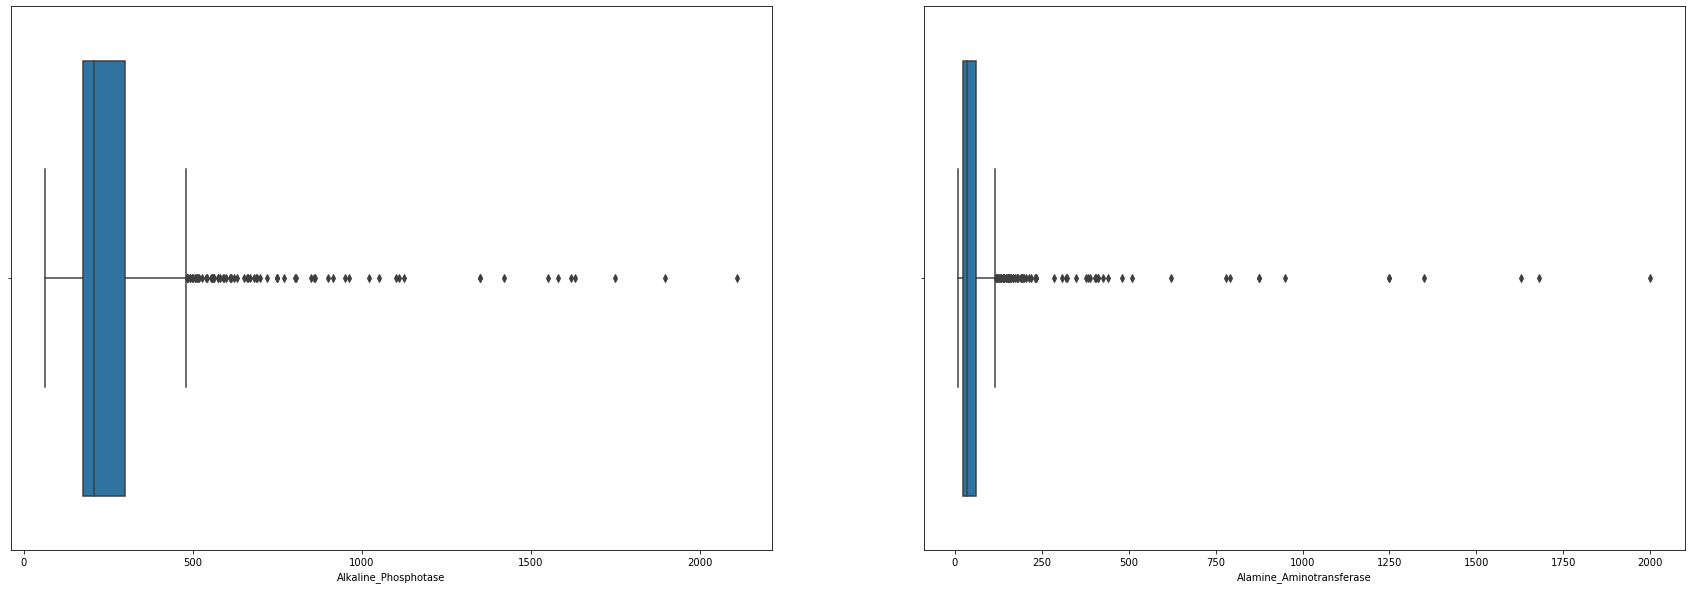

In [15]:
fig, axes = plt.subplots(1,2,figsize = (30, 10)) 

sns.boxplot(ax = axes[0], x = df["Alkaline_Phosphotase"]);

sns.boxplot(ax=axes[1], x=df['Alamine_Aminotransferase'])

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

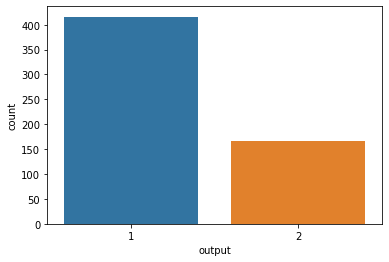

In [16]:
sns.countplot(df['output'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

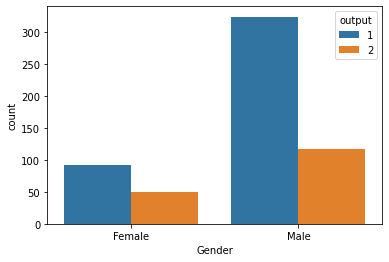

In [17]:
sns.countplot(x='Gender',hue='output',data=df)

-As we can observe that data is imbalanced, this leads to model cant able to gain much information from class-2, unless and untill if these minority sample represents the entire popluation.

In [18]:
#handling the categorical gender column, We can also use label encoding
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [19]:
#simlarly handling output labels
#we have 400 liver patient records labeled as '1' and remaining as '2'.
#df['Output'] = df['output'].map({1:1,2:0})
def partition (x):
    if x==2:
        return 0
    return 1
df['output'] = df['output'].map(partition)

In [20]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,output
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


# Using SMOTE  to resample the minority class

In [23]:
from imblearn.over_sampling import SMOTE
re_sample = SMOTE()

In [24]:
#spliting the independent and dependent columns
X = df.iloc[:, :-1].values
y = df.iloc[:,-1]

In [25]:
X_,y_ =re_sample.fit_resample(X, y)

In [26]:
y_.value_counts()

1    416
0    416
Name: output, dtype: int64

In [27]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

In [28]:
X_scaled = ss.fit_transform(X_)
#X_test = ss.fit(X_test)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y_,train_size=0.80,random_state=101)

# Model Building

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb= MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [39]:
y_pred1 = mnb.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77        88
           1       0.82      0.53      0.65        79

    accuracy                           0.72       167
   macro avg       0.75      0.71      0.71       167
weighted avg       0.75      0.72      0.71       167



In [41]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

In [42]:
svc.fit(X_train,y_train)

SVC()

In [43]:
train_pred = svc.predict(X_train)

In [44]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       328
           1       0.86      0.54      0.66       337

    accuracy                           0.72       665
   macro avg       0.76      0.72      0.71       665
weighted avg       0.76      0.72      0.71       665



In [47]:
y_pred2 = svc.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        88
           1       0.79      0.52      0.63        79

    accuracy                           0.71       167
   macro avg       0.73      0.70      0.69       167
weighted avg       0.73      0.71      0.70       167



<AxesSubplot:>

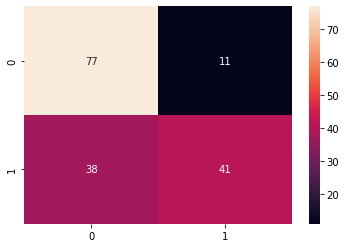

In [49]:
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score
confusion = confusion_matrix(y_test,y_pred2)
sns.heatmap(confusion,annot=True)

# ANN

In [50]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [51]:
classifier = Sequential()
#adding the input and hideen layer
classifier.add(Dense(units=400, activation = 'relu', input_dim=10))
classifier.add(Dropout(rate=0.1))

#adding second hidden layer
classifier.add(Dense(units=400, activation='relu'))
classifier.add(Dropout(rate=0.1))

#output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [52]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
classifier.fit(X_scaled,y_,batch_size=32, epochs=300)

Epoch 1/5
26/26 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 0.9471
Epoch 2/5
26/26 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9279
Epoch 3/5
26/26 [==============================] - 0s 5ms/step - loss: 0.1717 - accuracy: 0.9411
Epoch 4/5
26/26 [==============================] - 0s 4ms/step - loss: 0.1226 - accuracy: 0.9627
Epoch 5/5
26/26 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9555


In [64]:
pred = classifier.predict(X_scaled)

26/26 [==============================] - 0s 3ms/step


# Prediction With Input

In [69]:
print(classifier.predict(ss.transform([[65,0,0.7,0.1,187,16,18,6.8,4.8,0.90]])) > 0.5)

1/1 [==============================] - 0s 24ms/step
[[ True]]


--True indicates this person has Liver Disease, flase indicates the person doesn't have liver disease.

In [70]:
print(classifier.predict(ss.transform([[60,1,0.5,0.1,500,20,34,5.9,1.6,0.37]])) > 0.5)

1/1 [==============================] - 0s 16ms/step
[[False]]


# Saving the model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
#Saving created neural network
classifier.save("liver_disease.h5")

In [67]:
import pickle
pickle.dump(ss,open('scaling.pkl','wb'))